In [1]:
# SQLAlchemy CLIMATE STARTER to build code to refect, inspect, create a dataframe, query, graph, join
# Patricia Hurlocker


In [2]:
# Prepare and import all matplotlib required componets (provided)
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
# Prepare and import all depenancies / required componets
import numpy as np
import pandas as pd

In [4]:
# Prepare and import all depenancies / required componets
import datetime as dt
import datetime
import time

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, Column, Integer, String, Float, and_, Date, desc

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Use the INSPECTOR declared above (same ase base.classes.keys)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
# Use the tables and see how the data is defined and organized in columns for the "measurement" table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Use the tables and see how the data is defined and organized in columns for the "station" table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Query the "measurement" table and determine how many entries exist: verify 19551 (includes header)
session.query(func.count(Measurement.date)).all()

[(19550)]

In [15]:
# Query the "measurement" table and determine the earliest collection date 
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [16]:
# Query the "measurement" table and determine the last collection date 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
# Query the "station" table and verify the number of stations = 9 and their locations
engine.execute('select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [18]:
# Provide an interface to enter the trip start and end date
date_entry = input('Enter a start date for your trip in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
start_date = datetime.date(year, month, day)

date_entry = input('Enter an end date for your trip in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
end_date = datetime.date(year, month, day)

Enter a start date for your trip in YYYY-MM-DD format: 2018-02-07
Enter an end date for your trip in YYYY-MM-DD format: 2018-02-14


In [19]:
# Get the date 1 year ago
year_ago = end_date - datetime.timedelta(365)

pcp_year = session.query(Measurement.date, Measurement.prcp).filter(and_(Measurement.date <= end_date,
                                                                        Measurement.date >= year_ago)).all()

# Create the dataframe and set date as the index
pcp_df = pd.DataFrame(pcp_year, columns=["date", "precipitation"])
pcp_df.set_index('date', inplace=True)


# Plot the dataframe as a chart using pandas plotting
pcp_df.iloc[::-1].plot(title="Precipitation from %s to %s" % (year_ago, end_date))
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from '2017-08-20'
year_today = dt.date(2017,8,20)
year_ago = year_today - dt.timedelta(days=365)


yearly_data = session.query(Measurement.__table__).\
    filter(and_(Measurement.date >= year_ago, Measurement.date < year_today)).\
    order_by(Measurement.date).all()    

# Save the query results as a Pandas DataFrame and set the index to the date column
yearly_df = pd.DataFrame(yearly_data, columns = ['ID','Station #','Date','Precipitation (in Inches)',\
                                                 'Time of Observation Changes (TOC)'])

yearly_df.set_index('Date', inplace= True)

yearly_df


# Sort the dataframe by date
# already done when querying data (order_by statement)

# Use Pandas Plotting with Matplotlib to plot the data
yearly_df.plot(y='Precipitation (in Inches)', title="Precipitation Chart from 8-20-16 to 8-19-17", legend=True)

# Rotate the xticks for the dates
# to revisit to clean up, switch to plt from pandas plot

<IPython.core.display.Javascript object>

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today
# last_year_dt = dt.date.today() - dt.timedelta(days=365)


# Calculate the date 1 year ago from '2017-08-01'
year_today = dt.date(2017,8,1)
year_ago = year_today - dt.timedelta(days=365)

yearly_data = session.query(Measurement.__table__).\
    filter(and_(Measurement.date >= year_ago, Measurement.date < year_today)).\
    order_by(Measurement.date).all()    

# Save the query results as a Pandas DataFrame and set the index to the date column
yearly_df = pd.DataFrame(yearly_data, columns = ['ID','Station #','Date','Precipitation (in Inches)',\
                                                 'Time of Observation Changes (TOC)'])

yearly_df.set_index('Date', inplace= True)


# Sort the dataframe by date
# already done when querying data (order_by statement)

# Use Pandas Plotting with Matplotlib to plot the data
yearly_df.plot(y='Precipitation (in Inches)', title="Precipitation Chart from 7-31-16 to 8-1-17", legend=True)

# Rotate the xticks for the dates

# CODE NOT WORKING
# Perform a query to retrieve the data and precipitation scores
#prcp_data # session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year_dt).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
#prcp_df = #.DataFrame(prcp_data, columns = ["Date", "Precipitation"])
#prcp_df.set_index(prcp_df["Date"], inplace = True)
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
#prcp_df.plot()

# Rotate the xticks for the dates

#plt.xticks(rotation = '45')
#plt.tight_layout()
#plt.show()


<IPython.core.display.Javascript object>

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df = yearly_df.drop(columns = ['ID', 'Time of Observation Changes (TOC)','Station #'])
prcp_df.describe()

,Precipitation (in Inches)
count,2067.000000
mean,0.187557
std,0.475160
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


In [23]:
# How many stations are available in this dataset?
num_stations = session.query(Station.station).count()
print("The number of collection stations in Hawaii is: %s" % num_stations)

The number of collection stations in Hawaii is: 9


In [24]:
# What are the most active stations?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.date)).\
                  group_by(Measurement.station).\
                  order_by(desc(func.count(Measurement.date))).all()
most_active = active_stations[0][0]
num_observations = active_stations[0][1]

print("The most active station is: %s" % most_active)
print("Number of observations for station %s: %s" % (most_active, num_observations))

active = session.query(Measurement.station, func.count(Measurement.station)).\
         group_by(Measurement.station).\
         order_by(func.count(Measurement.station).desc()).all()
active

The most active station is: USC00519281
Number of observations for station USC00519281: 2772


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

min_max_avg = session.query(func.min(Measurement.tobs),\
                            func.max(Measurement.tobs),\
                            func.avg(Measurement.tobs)).\
                            filter(Measurement.station == 'USC00519281').all()

print(min_max_avg)


[(54.0, 85.0, 71.66378066378067)]


In [26]:
# Choose the station with the highest number of temperature observations.  HTOb
# Query the last 12 months of temperature observation data for this station and plot the results as a histogrammin_max_avg = session.query(func.min(Measurement.tobs),\
HTOb_station = session.query(Measurement.__table__).\
    filter(Measurement.station == 'USC00519281').\
    filter(and_(Measurement.date >= year_ago, Measurement.date < year_today)).all()
    
HTOb_station_df = pd.DataFrame(HTOb_station, columns = ['ID','Station #','Date','Precipitation (in Inches)',\
                                                 'Temperature'])

HTOb_station_df.set_index('Date', inplace= True)
HTOb_station_df.hist('Temperature', bins=5,figsize=(8,5))
plt.title('Reported Temperature Observations at WAIHEE Station USC00519281',size=10)


<IPython.core.display.Javascript object>

Text(0.5,1,'Reported Temperature Observations at WAIHEE Station USC00519281')

In [27]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-02-07','2017-02-14'))

[(59.0, 69.15094339622641, 80.0)]


<IPython.core.display.Javascript object>


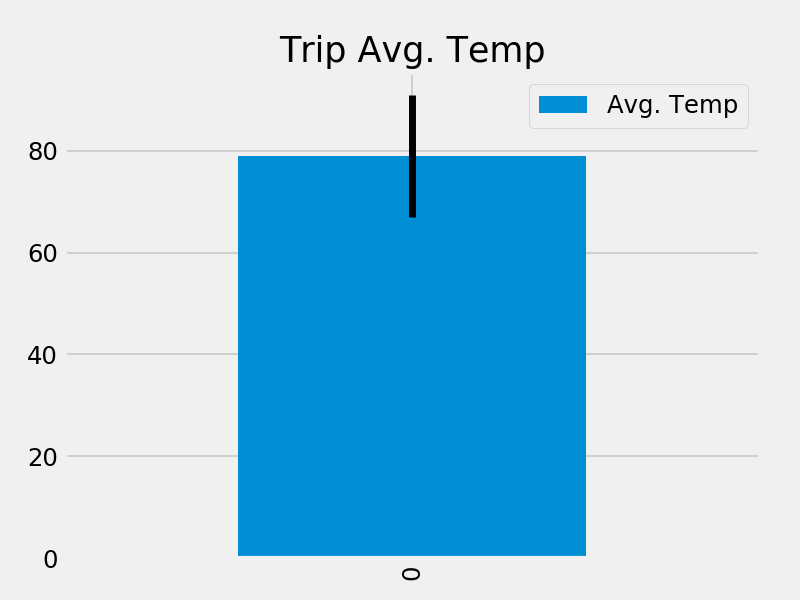

Text(0.5,1,'Trip Avg. Temp')

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Uses the average temperature for the y value
# Uses the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
previous_yr_temps = pd.DataFrame(data=calc_temps('2017-08-01','2017-08-11'),columns=['Min. Temp','Avg. Temp','Max Temp'])
previous_yr_temps.plot(kind='bar',y=['Avg. Temp'],yerr = previous_yr_temps['Max Temp']-previous_yr_temps['Min. Temp'])
plt.title("Trip Avg. Temp")




In [30]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_start = '2017-02-07'
trip_end = '2017-02-14'
sel = [Measurement.station, Station.name, Measurement.date,func.sum(Measurement.prcp),\
       Station.latitude, Station.longitude, Station.elevation]

joined_data = session.query(*sel).filter(Measurement.station == Station.station).\
              filter(and_(Measurement.date >= trip_start,Measurement.date < trip_end)).\
              group_by(Measurement.station).all()

# joined_data = session.query(*sel).filter(Measurement.station == Station.station).\
#               filter(and_(Measurement.date >= trip_start, Measurement.date < trip_end)).\
#               group_by(Measurement.station).all()
joined_data

[('USC00513117',
  'KANEOHE 838.1, HI US',
  '2017-02-13',
  7.15,
  21.4234,
  -157.8015,
  14.6),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  '2017-02-13',
  5.2,
  21.5213,
  -157.8374,
  7.0),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  '2017-02-13',
  4.35,
  21.3331,
  -157.8025,
  152.4),
 ('USC00517948',
  'PEARL CITY, HI US',
  '2017-02-13',
  0.0,
  21.3934,
  -157.9751,
  11.9),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  '2017-02-13',
  6.039999999999999,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  '2017-02-13',
  3.45,
  21.2716,
  -157.8168,
  3.0),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  '2017-02-13',
  6.91,
  21.33556,
  -157.71139,
  19.5)]

## Optional Challenge Assignment

In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

normals = []

# Set the start and end date of the trip
trip_start_dt = dt.datetime(2017,2,7)
trip_end_dt = dt.datetime(2017,2,14)

# Use the start and end date to create a range of dates
dates_range = [trip_start_dt + dt.timedelta(n) for n in range(int((trip_end_dt - trip_start_dt).days))]

# Strip off the year and save a list of %m-%d strings
dates_range_md = [each.strftime("%m-%d") for each in dates_range]

# Loop through the list of %m-%d strings and calculate the normals for each date
for each in dates_range_md:
    normals.append(daily_normals(each))

flat_list = [item for sublist in normals for item in sublist]
flat_list


[(60.0, 69.0, 77.0),
 (56.0, 66.75438596491227, 74.0),
 (57.0, 67.58928571428571, 75.0),
 (56.0, 68.41666666666667, 76.0),
 (61.0, 69.25, 79.0),
 (60.0, 69.15789473684211, 78.0),
 (58.0, 70.36206896551724, 80.0)]

In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(flat_list, columns = ['Avg. Min Temp','Avg. Temp','Avg. Max Temp'],index=dates_range)
normals_df

,Avg. Min Temp,Avg. Temp,Avg. Max Temp
2017-02-07,60.0,69.000000,77.0
2017-02-08,56.0,66.754386,74.0
2017-02-09,57.0,67.589286,75.0
2017-02-10,56.0,68.416667,76.0
2017-02-11,61.0,69.250000,79.0
2017-02-12,60.0,69.157895,78.0
2017-02-13,58.0,70.362069,80.0


<IPython.core.display.Javascript object>


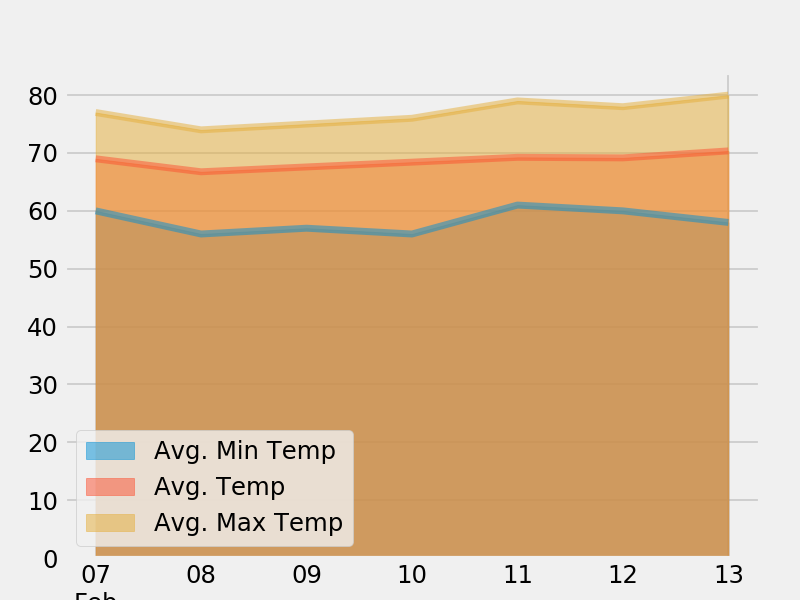

In [34]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False)